# Code for the paper "Isolating Cost Drivers in Interstitial Lung Disease Treatment Using Nonparametric Bayesian Methods" by C. Kurz and S. Stafford

load necessary packages

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from collections import Counter
from matplotlib import pylab as plt
import bnpy

load the data

In [2]:
post = pd.read_csv("~/ownCloud/docs/papers/ecomild/data/post3.csv")

X=post.iloc[:,0:16].values  # all covariates except costs
y=post['cost'].values.reshape(8972,1)  # only costs

summary of the data

In [3]:
post.describe()

,(Intercept),age,sex,entity2,entity3,entity4,entity5,entity7,entity8,entity9,entity10,CI,luca,GERD,PH,elix_index,cost
count,8972.0,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000
mean,1.0,63.532914,0.460544,0.230718,0.335488,0.013041,0.018836,0.007022,0.030428,0.032434,0.003901,2.450178,0.028199,0.135756,0.057066,4.177887,8409.452311
std,0.0,15.081560,0.498469,0.421316,0.472187,0.113455,0.135955,0.083506,0.171771,0.177160,0.062340,2.515779,0.165550,0.342548,0.231982,2.756901,12035.361843
min,1.0,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,52.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1437.052500
50%,1.0,67.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,3954.690000
75%,1.0,75.100000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,6.000000,9867.790000
max,1.0,98.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,16.000000,96873.730000


plot costs

(array([170., 271., 309., 373., 379., 392., 285., 278., 235., 236., 221.,
        159., 181., 180., 157., 136., 148., 147., 129., 133., 136., 126.,
        105., 103., 101.,  91., 110.,  93.,  73.,  91.,  86.,  73.,  69.,
         71.,  64.,  61.,  78.,  68.,  80.,  53.,  55.,  62.,  47.,  56.,
         51.,  47.,  47.,  50.,  47.,  44.]),
 array([   0.    ,  199.7432,  399.4864,  599.2296,  798.9728,  998.716 ,
        1198.4592, 1398.2024, 1597.9456, 1797.6888, 1997.432 , 2197.1752,
        2396.9184, 2596.6616, 2796.4048, 2996.148 , 3195.8912, 3395.6344,
        3595.3776, 3795.1208, 3994.864 , 4194.6072, 4394.3504, 4594.0936,
        4793.8368, 4993.58  , 5193.3232, 5393.0664, 5592.8096, 5792.5528,
        5992.296 , 6192.0392, 6391.7824, 6591.5256, 6791.2688, 6991.012 ,
        7190.7552, 7390.4984, 7590.2416, 7789.9848, 7989.728 , 8189.4712,
        8389.2144, 8588.9576, 8788.7008, 8988.444 , 9188.1872, 9387.9304,
        9587.6736, 9787.4168, 9987.16  ]),
 <a list of 50 Patch ob

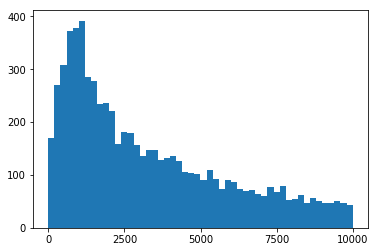

In [4]:
plt.hist(y[y < 10000], 50)

analyze the data with bnpy

In [5]:
dat = bnpy.data.XData(X=X, Y=y)

Reg_trained_model, Reg_info_dict = bnpy.run(
dat, 'DPMixtureModel', 'GaussRegressYFromFixedX', 'memoVB',
output_path='/tmp/t1/',
nLap=250, nTask=1, nBatch=1, pnu=0.01, ptau=0.1, P_diag_val=1.0,
K=10, initname='randexamples',
moves='delete,merge,shuffle', m_startLap=5)

Dataset Summary:
X Data
  total size: 8972 units
  batch size: 8972 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian regression model for 1D output y from fixed input x
Obs. Data  Prior:  Gaussian-Wishart joint prior on regression weights/prec
Wishart on precision scalar
     pnu = 0.01
    ptau = 0.1
    mean = 0.1
Gaussian on regression weight vector
          mean = [ 0  0]
    diag[prec] = [ 1  1]

Initialization:
  initname = randexamples
  K = 10 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/t1/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
DELETE @ lap 1.00: Disabled. Cannot delete before first complete lap, because SS that represents whole dataset is required.
    1.000/250 after      0 sec. |    154.5 MiB | K   10 | loss  1.024908684e+

/home/ubu/Downloads/bnpy/bnpy/__init__.py:10: FutureWarning: memory_info_ex() is deprecated and will be removed; use memory_info() instead
  mem_MiB = process.memory_info_ex().rss / float(2 ** 20)


DELETE @ lap 2.00: 1/1 accepted. Ndiff 1975.56.
    2.000/250 after      1 sec. |    155.5 MiB | K    9 | loss  9.887547687e+00 |  
MERGE @ lap 3.00: Disabled. Waiting for lap >= 5 (--m_startLap).
DELETE @ lap 3.00: 1/1 accepted. Ndiff 2626.38.
    3.000/250 after      1 sec. |    156.3 MiB | K    8 | loss  9.877906479e+00 |  
MERGE @ lap 4.00: Disabled. Waiting for lap >= 5 (--m_startLap).
DELETE @ lap 4.00: 0/1 accepted. Ndiff 0.00.
    4.000/250 after      2 sec. |    155.7 MiB | K    8 | loss  9.877146219e+00 | Ndiff   44.356 
DELETE @ lap 5.00: 1/1 accepted. Ndiff 1795.21.
    5.000/250 after      3 sec. |    155.7 MiB | K    7 | loss  9.875811744e+00 | Ndiff   44.356 
DELETE @ lap 6.00: 1/1 accepted. Ndiff 2413.28.
    6.000/250 after      3 sec. |    155.6 MiB | K    6 | loss  9.871599574e+00 | Ndiff   44.356 
DELETE @ lap 7.00: 0/1 accepted. Ndiff 0.00.
MERGE @ lap 7.00 : 0/15 accepted. Ndiff 0.00. 0 skipped.
    7.000/250 after      4 sec. |    155.8 MiB | K    6 | loss  9.871

MERGE @ lap 42.00 : 0/3 accepted. Ndiff 0.00. 0 skipped.
   42.000/250 after     17 sec. |    155.9 MiB | K    5 | loss  9.864927425e+00 | Ndiff    3.881 
MERGE @ lap 43.00: No promising candidates, so no attempts.
DELETE @ lap 43.00: 0/1 accepted. Ndiff 0.00.
   43.000/250 after     17 sec. |    155.9 MiB | K    5 | loss  9.864911714e+00 | Ndiff    3.649 
MERGE @ lap 44.00: No promising candidates, so no attempts.
DELETE @ lap 44.00: 0/1 accepted. Ndiff 0.00.
   44.000/250 after     18 sec. |    155.9 MiB | K    5 | loss  9.864897502e+00 | Ndiff    3.430 
DELETE @ lap 45.00: Empty plan. 0 UIDs eligible as delete target. 0 too busy with other moves. 0 too big. 5 have past failures.
MERGE @ lap 45.00 : 0/7 accepted. Ndiff 0.00. 0 skipped.
   45.000/250 after     18 sec. |    155.9 MiB | K    5 | loss  9.864884648e+00 | Ndiff    3.224 
MERGE @ lap 46.00: No promising candidates, so no attempts.
DELETE @ lap 46.00: 0/1 accepted. Ndiff 0.00.
   46.000/250 after     18 sec. |    155.9 MiB |

MERGE @ lap 80.00 : 0/7 accepted. Ndiff 0.00. 0 skipped.
   80.000/250 after     29 sec. |    155.9 MiB | K    5 | loss  9.864766915e+00 | Ndiff    0.530 
MERGE @ lap 81.00: No promising candidates, so no attempts.
DELETE @ lap 81.00: Empty plan. 0 UIDs eligible as delete target. 0 too busy with other moves. 0 too big. 5 have past failures.
   81.000/250 after     29 sec. |    155.9 MiB | K    5 | loss  9.864766572e+00 | Ndiff    0.504 
DELETE @ lap 82.00: 0/1 accepted. Ndiff 0.00.
MERGE @ lap 82.00 : 0/3 accepted. Ndiff 0.00. 0 skipped.
   82.000/250 after     29 sec. |    155.9 MiB | K    5 | loss  9.864766261e+00 | Ndiff    0.480 
MERGE @ lap 83.00: No promising candidates, so no attempts.
DELETE @ lap 83.00: 0/1 accepted. Ndiff 0.00.
   83.000/250 after     29 sec. |    155.9 MiB | K    5 | loss  9.864765981e+00 | Ndiff    0.457 
MERGE @ lap 84.00: No promising candidates, so no attempts.
DELETE @ lap 84.00: 0/1 accepted. Ndiff 0.00.
   84.000/250 after     30 sec. |    155.9 MiB |

MERGE @ lap 118.00: No promising candidates, so no attempts.
DELETE @ lap 118.00: 0/1 accepted. Ndiff 0.00.
  118.000/250 after     40 sec. |    155.9 MiB | K    5 | loss  9.864763409e+00 | Ndiff    0.079 
MERGE @ lap 119.00: No promising candidates, so no attempts.
DELETE @ lap 119.00: 0/1 accepted. Ndiff 0.00.
  119.000/250 after     40 sec. |    155.9 MiB | K    5 | loss  9.864763401e+00 | Ndiff    0.075 
DELETE @ lap 120.00: 0/1 accepted. Ndiff 0.00.
MERGE @ lap 120.00 : 0/7 accepted. Ndiff 0.00. 0 skipped.
  120.000/250 after     40 sec. |    155.9 MiB | K    5 | loss  9.864763394e+00 | Ndiff    0.072 
MERGE @ lap 121.00: No promising candidates, so no attempts.
DELETE @ lap 121.00: 0/1 accepted. Ndiff 0.00.
  121.000/250 after     41 sec. |    155.9 MiB | K    5 | loss  9.864763388e+00 | Ndiff    0.068 
DELETE @ lap 122.00: 0/1 accepted. Ndiff 0.00.
MERGE @ lap 122.00 : 0/3 accepted. Ndiff 0.00. 0 skipped.
  122.000/250 after     41 sec. |    155.9 MiB | K    5 | loss  9.86476338

MERGE @ lap 156.00: No promising candidates, so no attempts.
DELETE @ lap 156.00: 0/1 accepted. Ndiff 0.00.
  156.000/250 after     51 sec. |    155.9 MiB | K    5 | loss  9.864763332e+00 | Ndiff    0.012 
DELETE @ lap 157.00: 0/1 accepted. Ndiff 0.00.
MERGE @ lap 157.00 : 0/3 accepted. Ndiff 0.00. 0 skipped.
  157.000/250 after     51 sec. |    155.9 MiB | K    5 | loss  9.864763332e+00 | Ndiff    0.011 
MERGE @ lap 158.00: No promising candidates, so no attempts.
DELETE @ lap 158.00: 0/1 accepted. Ndiff 0.00.
  158.000/250 after     52 sec. |    156.1 MiB | K    5 | loss  9.864763332e+00 | Ndiff    0.011 
MERGE @ lap 159.00: No promising candidates, so no attempts.
DELETE @ lap 159.00: Empty plan. 0 UIDs eligible as delete target. 0 too busy with other moves. 0 too big. 5 have past failures.
  159.000/250 after     52 sec. |    156.1 MiB | K    5 | loss  9.864763332e+00 | Ndiff    0.010 
DELETE @ lap 160.00: 0/1 accepted. Ndiff 0.00.
MERGE @ lap 160.00 : 0/7 accepted. Ndiff 0.00. 0 s

get the mixture weights

In [6]:
Reg_trained_model.allocModel.get_active_comp_probs()

array([0.27087825, 0.24126034, 0.190993  , 0.17840869, 0.11834848])

get the regression weights (coefficients)

In [7]:
Reg_trained_model.obsModel.Post.w_KE

array([[ 6.13205109e+02,  1.81422235e+01,  3.08953515e+02,
        -1.56255637e+01, -3.10165879e+02, -2.01733867e+02,
        -3.80112496e+02, -5.23853924e+02, -5.72360463e+02,
        -7.75733569e+02, -4.55507324e+01,  6.15120604e+02,
        -1.48778021e+02,  3.59926729e+02,  1.53980431e+03,
         1.57820629e+02,  6.13205109e+02],
       [ 3.58238992e+03, -2.01987601e+00,  7.15537918e+01,
         2.17133763e+02, -1.79951538e+03,  1.91251473e+03,
        -2.85244702e+03, -2.28377363e+03, -5.09329505e+02,
        -2.82695718e+03,  4.91696353e+01,  1.13099419e+03,
         1.62524516e+03,  8.05056642e+02,  3.86527377e+03,
         2.23984836e+02,  3.58238992e+03],
       [ 5.76322764e+01,  1.09762642e+01,  1.46566672e+02,
        -1.13438109e+02,  6.76995014e+01,  2.28950773e+02,
        -3.58771387e+02, -4.80716663e+02,  1.44798418e+02,
        -3.70576465e+02,  5.61584466e+01,  2.83725050e+02,
         1.56275204e+02,  3.48046073e+02,  5.10719505e+02,
         1.30389496e+02,  5.7

get the cluster assignments

In [8]:
LP = Reg_trained_model.calc_local_params(dat)
resp = LP['resp']

Z = resp.argmax(axis=1)  # cluster assignments
Counter(Z)

Counter({0: 2374, 1: 1941, 2: 1576, 3: 2202, 4: 879})